# Author: Amit Hulandageri

In [1]:
import numpy as np
import math
import matplotlib.pylab as plt

# Initialization

In [2]:
dataset_path = "words_stream.txt" # path to the sampled dataset
counts_path = "counts.txt" # path to the counts file
hash_path = "hash_params.txt" # path to hash parameters file
delta = math.exp(-5)
epsilon = math.exp(1) * (10**-4)
p = 123457

In [3]:
hash_pairs = np.loadtxt(hash_path, delimiter = '\t', dtype = 'int')

# Hash Function

In [4]:
# Returns hash(x) for hash function given by parameters a, b, p and buckets
def hash(a, b, p, buckets, x):
    y = x % p
    hash_val = (a*y+b) % p
    return hash_val % buckets

# Implementation

In [21]:
# Input - a dictionary, D, whose keys are word IDs and counts are the keys

def log_plot(D, title, x_label, y_label):
    D = sorted(D.items())

    x, y = zip(*D)

    plt.figure(figsize=(8,6))
    plt.loglog(x, y)
    
    plt.suptitle(title, fontsize=20)
    plt.xlabel(x_label,fontsize=18)
    plt.ylabel(y_label,fontsize=18)
    
    plt.show()

In [31]:
def estimate(dataset_path, counts_path, hash_path, delta, epsilon, p):
    
    j_u = math.ceil(math.log(1/delta))   # upper limit of j
    h_u = math.ceil((math.exp(1)) / epsilon) - 1     # upper limit of hashed value
    
    # Initialization
    C = np.zeros((j_u, h_u))
    F_approx = {}
    F = {}
    E = {}

    # Building C matrix
    with open(dataset_path) as file:
        for line in file:

            word_id = int(line)

            F_approx[word_id] = 0

            for j in range(0,j_u):
                a = hash_pairs[j,0]
                b = hash_pairs[j,1]

                word_hash = hash(a, b, p, h_u, word_id)

                C[j][word_hash] += 1
    
    for word_id in F_approx:
        c_list = []
        for j in range(0,j_u):
            a = hash_pairs[j,0]
            b = hash_pairs[j,1]

            word_hash = hash(a, b, p, h_u, word_id)

            c_list.append(C[j][word_hash])
        
        F_approx[word_id] = min(c_list)
    
    with open(counts_path) as file:
        for line in file:
            line = line.split()

            word_id = int(line[0])
            word_count = int(line[1])

            F[word_id] = word_count
            
    for word_id in F_approx:
        E[word_id] = (F_approx[word_id] - F[word_id]) / F[word_id]
        
    return E, F, F_approx

### Calling Driver Function

In [16]:
E, F, F_approx = estimate(dataset_path, counts_path, hash_path, delta, epsilon, p)

# Plots

## Relative Error

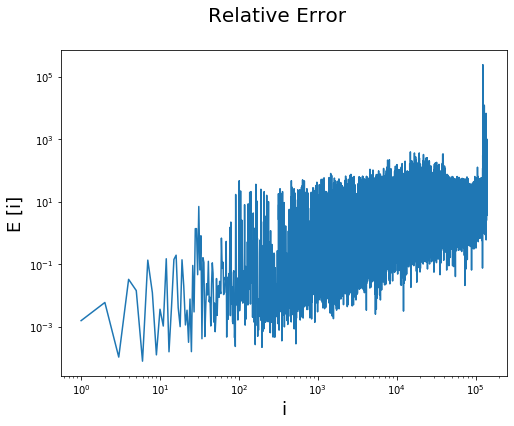

In [28]:
log_plot(E, "Relative Error", "i", "E [i]")

## F approx

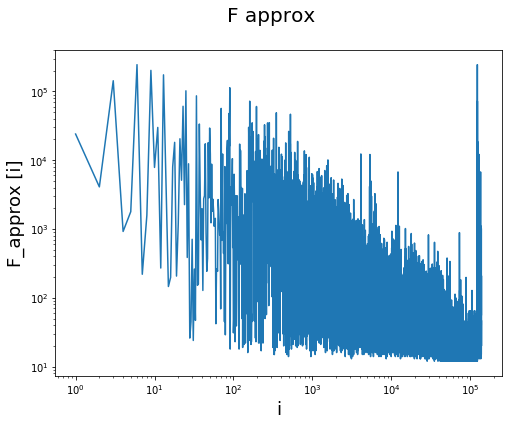

In [30]:
log_plot(F_approx, "F approx", "i", "F_approx [i]")

## F

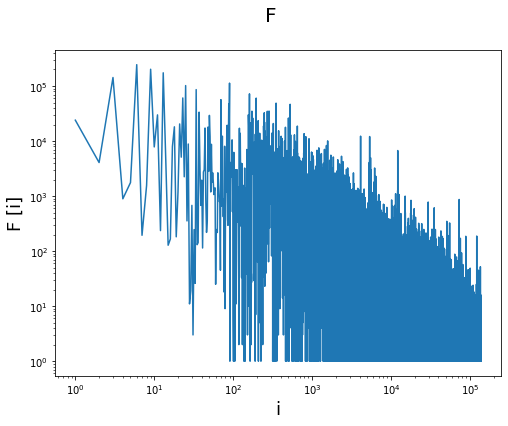

In [29]:
log_plot(F, "F", "i", "F [i]")